In [22]:
import pandas as pd
df = pd.read_table('http://data.princeton.edu/wws509/datasets/salary.dat',delim_whitespace=True)
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


In [15]:
dummy = pd.get_dummies(df['sx'])
dummy.head()

,female,male
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [20]:
df = pd.concat([df, dummy], axis=1)
df.head()

,sx,rk,yr,dg,yd,sl,female,male,female,male,female,male
0,male,full,25,doctorate,35,36350,0,1,0,1,0,1
1,male,full,13,doctorate,22,35350,0,1,0,1,0,1
2,male,full,10,doctorate,23,28200,0,1,0,1,0,1
3,female,full,7,doctorate,27,26775,1,0,1,0,1,0
4,male,full,19,masters,30,33696,0,1,0,1,0,1


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


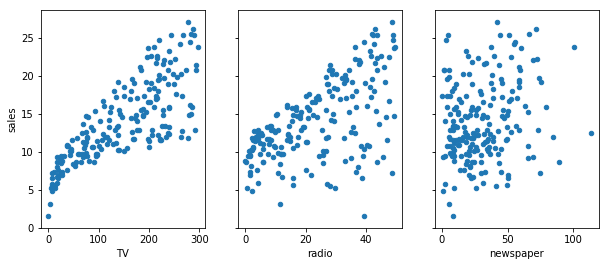

In [60]:
#scatterplots for the data
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize = (10,4))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y ='sales', ax=axs[2])

In [80]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ newspaper', data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 11 Jan 2018   Prob (F-statistic):            0.00115
Time:                        13:51:49   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.000      11.126      13.577
newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
lm.params

Intercept    12.351407
newspaper     0.054693
dtype: float64

In [82]:
X_new = pd.DataFrame({'newspaper': [10000]})
X_new.head()

,newspaper
0,10000


In [83]:
lm.predict(X_new)

0    559.282392
dtype: float64

In [84]:
lm.conf_int()

,0,1
Intercept,11.125956,13.576859
newspaper,0.022005,0.087381


In [85]:
lm.pvalues

Intercept    4.713507e-49
newspaper    1.148196e-03
dtype: float64

In [105]:
import numpy as np


nums = np.random.rand(len(data))
mask_large = nums > 0.5

data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,small
2,44.5,39.3,45.1,10.4,large
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,small


In [106]:
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,small,0
2,44.5,39.3,45.1,10.4,large,1
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,small,0


In [117]:
nums2 = np.random.rand(len(data))
mask_suburban = (nums2 > 0.33) & (nums2 < 0.66)
mask_urban = nums2 > .66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area']='suburban'
data.loc[mask_urban, 'Area']='urban'
data.head()

,TV,radio,newspaper,sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,small,0,urban
2,44.5,39.3,45.1,10.4,large,1,urban
3,17.2,45.9,69.3,9.3,small,0,urban
4,151.5,41.3,58.5,18.5,small,0,rural
5,180.8,10.8,58.4,12.9,small,0,suburban


In [128]:
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Size,IsLarge,Area,Area_suburban,Area_urban,Area_suburban,Area_urban,Area_suburban,Area_urban,_suburban,_urban,Area_suburban,Area_urban,Area_urban,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,small,0,urban,0,1,0,1,0,1,0,1,0,1,1,0,1
2,44.5,39.3,45.1,10.4,large,1,urban,0,1,0,1,0,1,0,1,0,1,1,0,1
3,17.2,45.9,69.3,9.3,small,0,urban,0,1,0,1,0,1,0,1,0,1,1,0,1
4,151.5,41.3,58.5,18.5,small,0,rural,0,0,0,0,0,0,0,0,0,0,0,0,0
5,180.8,10.8,58.4,12.9,small,0,suburban,1,0,1,0,1,0,1,0,1,0,0,1,0


In [142]:
from scipy import stats
import seaborn as sns

data1 = [0] * 50
data1.extend(stats.norm(12, 4).rvs(150))
np.random.shuffle(data1)

data2 = [0] * 100
data2.extend (stats.norm(20, 5).rvs(100))
np.random.shuffle(data2)

df = pd.DataFrame()
df["A"] = data1
df["B"] = data2

df.head()

,A,B
0,0.000000,0.000000
1,8.592981,0.000000
2,12.224320,0.000000
3,6.639920,22.177959
4,13.592672,23.170032


(array([ 100.,    0.,    2.,    5.,   11.,   16.,   25.,   22.,   16.,    3.]),
 array([  0.        ,   3.13096589,   6.26193178,   9.39289767,
         12.52386355,  15.65482944,  18.78579533,  21.91676122,
         25.04772711,  28.178693  ,  31.30965888]),
 <a list of 10 Patch objects>)

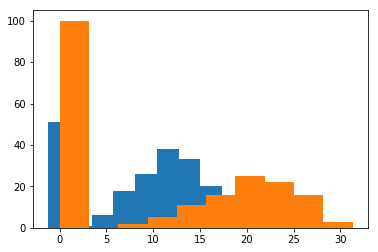

In [144]:
plt.hist(df["A"])
plt.hist(df["B"])

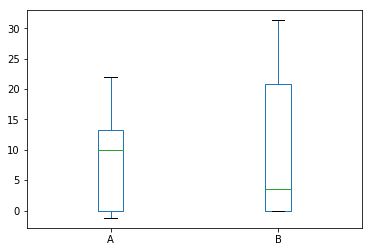

In [151]:
df.plot(kind="box")

In [152]:
from scipy import stats
plt.rcParams['figure.figsize'] = (10, 6)


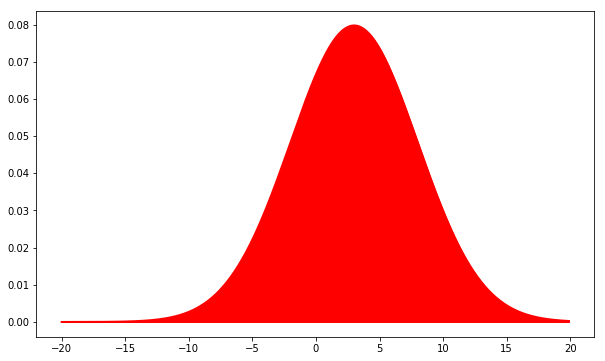

In [167]:
domain = np.arange (-20, 20, 0.1)
values = stats.norm(3, 5).pdf(domain)
plt.plot(domain, values, color='r', linewidth=2)
plt.fill_between(domain, 0, values, color='r', linewidth=1)


In [35]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
#create a sample dataframe and fit the model
df = pd.DataFrame({'x' : range(100), 'y' : range(100)})
biased_df = df.copy()
biased_df.loc[:20, 'x'] = 1
biased_df.loc[:20, 'y'] = 1

def append_jitter(series):
    jitter = np.random.random_sample(size=100)
    return series + jitter
df['x'] = append_jitter(df.x)
df['y'] = append_jitter(df.y)

biased_df['x'] = append_jitter(biased_df.x)
biased_df['y'] = append_jitter(biased_df.y)

lm = linear_model.LinearRegression().fit(df[['x']], df['y'])
print metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))


0.13673704115


In [36]:
lm_b = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
print metrics.mean_squared_error(biased_df['y'], lm_b.predict(biased_df[['x']]))

0.111115383742


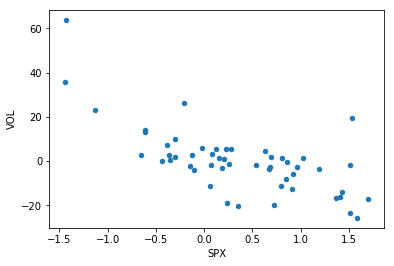

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
df_vix = pd.read_csv('H:\MyDocs\SPX_VOL.csv')
df_vix.plot(kind='scatter', x='SPX', y='VOL')

In [63]:
df_vix.describe()

,SPX,VOL
count,52.000000,52.000000
mean,0.344808,0.142500
std,0.771778,15.134552
min,-1.440000,-25.740000
25%,-0.165000,-6.525000
50%,0.250000,-0.190000
75%,0.872500,4.790000
max,1.700000,63.690000


In [64]:
import statsmodels.formula.api as smf
lm_vix = smf.ols(formula = 'VOL ~ SPX', data=df_vix).fit()
lm_vix.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VOL   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     44.99
Date:                Fri, 19 Jan 2018   Prob (F-statistic):           1.72e-08
Time:                        11:09:33   Log-Likelihood:                -197.88
No. Observations:                  52   AIC:                             399.8
Df Residuals:                      50   BIC:                             403.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7960      1.687      2.843      0.006       1.407       8.185
SPX          -13.4959      2.012     -6.708      0.000     -17.537      -9.455
==============================================================================
Omnibus:                       22.622   Durbin-Watson:                   2.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.437
Skew:                           1.317   Prob(JB):                     1.00e-09
Kurtosis:                       6.491   Cond. No.                         1.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
lm_vix.pvalues

Intercept    6.459049e-03
SPX          1.720806e-08
dtype: float64

In [34]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
cmap = {'0':'r', '1':'g', '2':'b'}
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])
print irisdf.plot('petal length (cm)', 'petal width (cm)', kind ='scatter', c=irisdf.ctarget)
print irisdf.describe()

def my_classifier(row):
    if row['petal length (cm)']<2:
        return 0
    else:
        return 1
    
predictions = irisdf.apply(my_classifier, axis=1)

AxesSubplot(0.125,0.125;0.775x0.755)
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [40]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.96
